# **Spoken Digit Recognition Model**

## Downloading the dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!pwd

/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d alanchn31/free-spoken-digits --force

 95% 15.0M/15.7M [00:01<00:00, 20.2MB/s]
100% 15.7M/15.7M [00:01<00:00, 12.1MB/s]


## **Exploratory Data Analysis And Data-Preprocessing**

## Import required libraries

In [ ]:
from fastai.vision.all import *
from fastcore.all import *
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from tqdm import tqdm
import os
import zipfile
from pathlib import Path

In [ ]:
import wave
import numpy as np
import IPython
from IPython.display import Image, display

In [ ]:
local_zip = '/content/free-spoken-digits.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
path=Path('/content/free-spoken-digit-dataset-master')

In [ ]:
folders = path.ls()
len(folders)

3

In [ ]:
audio_data_directory="/content/free-spoken-digit-dataset-master/recordings/"

In [ ]:
list = os.listdir(audio_data_directory)
for i in range(10):
    print(list[i])

9_lucas_16.wav
3_lucas_34.wav
4_jackson_20.wav
4_theo_23.wav
4_lucas_24.wav
8_jackson_45.wav
0_yweweler_29.wav
5_yweweler_37.wav
8_theo_28.wav
8_george_6.wav


In [ ]:
audio_file_name  = "9_lucas_16.wav"
audio_file = wave.open(audio_data_directory + audio_file_name, mode="r")
sampling_frequency = audio_file.getframerate()
audio_signal = np.frombuffer(audio_file.readframes(audio_file.getframerate()), dtype=np.int16)
audio_file.close()

In [ ]:
IPython.display.Audio(audio_data_directory + audio_file_name)

In [ ]:
import shutil
shutil.rmtree('/content/free-spoken-digit-dataset-master/utils')

In [ ]:
def load_audio_files(file, isPrint=False):
    y, sample_rate = librosa.load(file)
    audio_file, _ = librosa.effects.trim(y) # Trimming trailing silence from audio signal
    if isPrint:
        print('Raw audio: ', y)
        print('Sample rate: ', sample_rate)
        print('Trimmed audio: ', audio_file)
        print('Shape of Trimmed audio: ', np.shape(audio_file))
    return audio_file, sample_rate

In [ ]:
sample_audio_file, sample_sr = load_audio_files(Path('/content/free-spoken-digit-dataset-master/recordings/0_george_0.wav'), True)

Raw audio:  [-0.04289964 -0.04552099 -0.03932492 ... -0.00223843  0.00246574
  0.        ]
Sample rate:  22050
Trimmed audio:  [-0.04289964 -0.04552099 -0.03932492 ... -0.00223843  0.00246574
  0.        ]
Shape of Trimmed audio:  (6571,)


Text(108.75, 0.5, 'Amplitude')

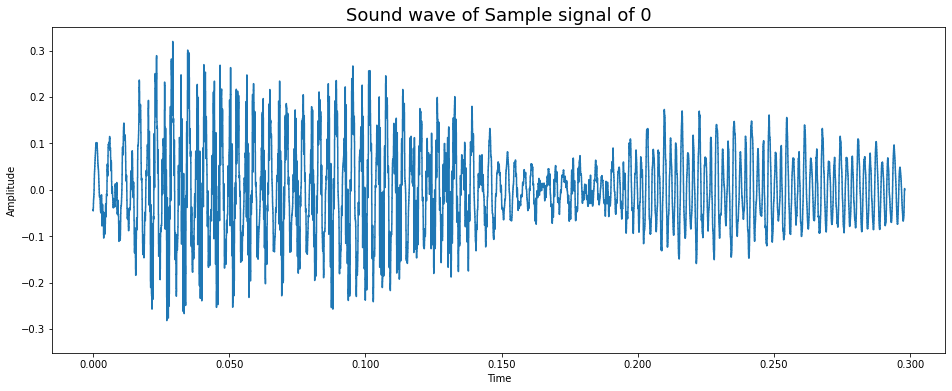

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveshow(y=sample_audio_file, sr = sample_sr);
plt.title('Sound wave of Sample signal of 0', fontsize=18);
plt.ylabel("Amplitude")

In [ ]:
def plot_four_audio_files_data(wav_file_names_list):
    plt.figure(figsize=(20,6))
    for i, audio_file_name in enumerate(wav_file_names_list):
        audio_file = wave.open(audio_data_directory + audio_file_name, mode ="r")
        audio_signal = np.frombuffer(audio_file.readframes(audio_file.getframerate()), dtype=np.int16)
        audio_file.close()
        signal_plot = plt.subplot(2, 4, 1 + i)
        librosa.display.waveshow(y=sample_audio_file, sr = sample_sr);
        IPython.display.display(IPython.display.Audio(audio_data_directory + audio_file_name))

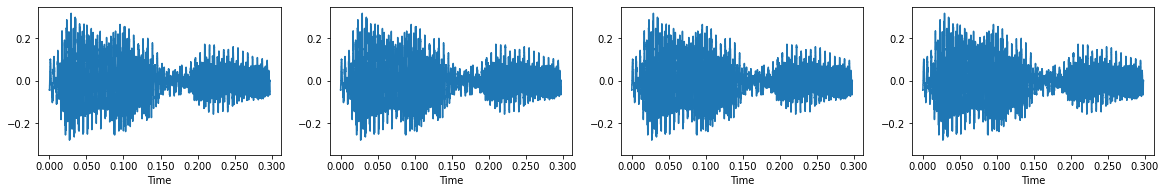

In [ ]:
examples_of_wav_files = (list[1],list[2],list[3],list[4])
plot_four_audio_files_data(examples_of_wav_files)

In [ ]:
N_FFT = 2048 #fft window size
HOP_LENGTH = 512 #No. of audio frames between STFT columns

In [ ]:
#Short Term Fourier Transform (STFT)
def fft(file):
    audio_file, _ = load_audio_files(file)
    stft_audio = np.abs(librosa.stft(audio_file, n_fft = N_FFT, hop_length = HOP_LENGTH))
    return stft_audio

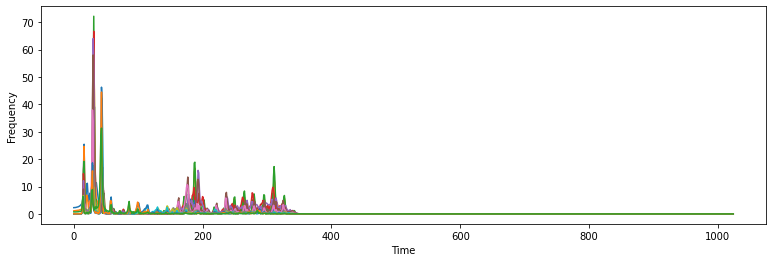

In [ ]:
plt.figure(figsize=(13,4))
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.plot(sample_fft);

In [ ]:
#Mel Spectrogram
def show_spectrogram(title, spec, sample_rate):
    plt.figure(figsize=(16,6));
    plt.title(title, fontsize=20);
    librosa.display.specshow(spec, sr=sample_rate, hop_length=HOP_LENGTH, x_axis='time', y_axis='log');
    plt.show();

In [ ]:
def mel_spectrogram_tfm(file, show=False):
    audio_file, sample_rate = load_audio_files(file)
    spec = librosa.feature.melspectrogram(audio_file, sr=sample_rate, n_fft=N_FFT, hop_length=HOP_LENGTH)
    spec_db = librosa.amplitude_to_db(spec, ref=np.max)
    return spec_db, sample_rate

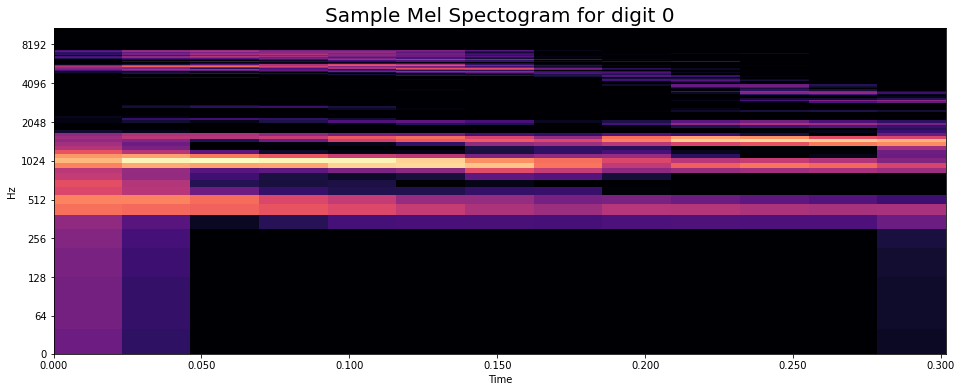

In [ ]:
spec_db, sample_rate = mel_spectrogram_tfm(Path('/content/free-spoken-digit-dataset-master/recordings/0_george_0.wav'), show=True) 
show_spectrogram('Sample Mel Spectogram for digit 0', spec_db, sample_rate)

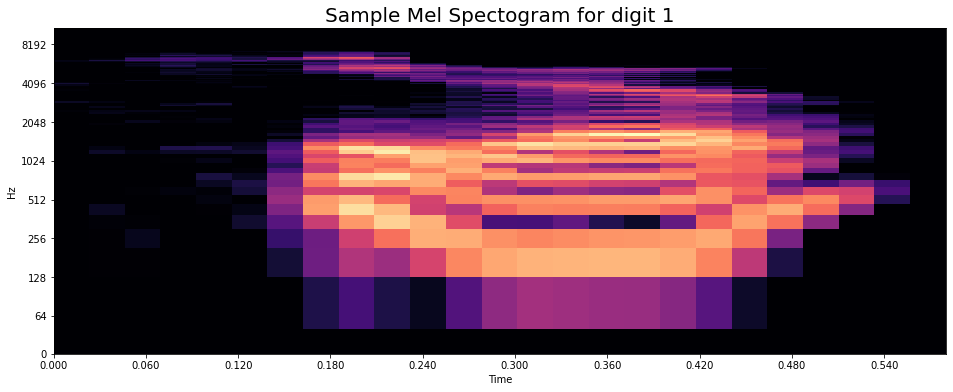

In [ ]:
spec_db, sample_rate = mel_spectrogram_tfm(Path('/content/free-spoken-digit-dataset-master/recordings/0_lucas_30.wav'), show=True) 
show_spectrogram('Sample Mel Spectogram for digit 1', spec_db, sample_rate)

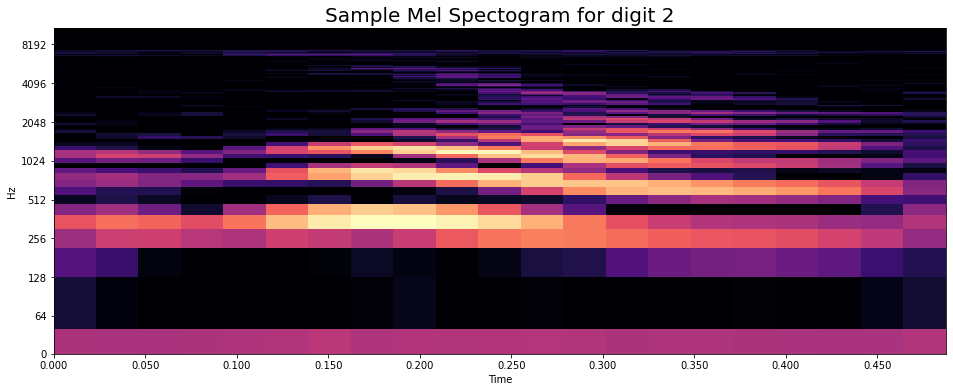

In [ ]:
spec_db, sample_rate = mel_spectrogram_tfm(Path('/content/free-spoken-digit-dataset-master/recordings/0_nicolas_40.wav'), show=True) 
show_spectrogram('Sample Mel Spectogram for digit 2', spec_db, sample_rate)

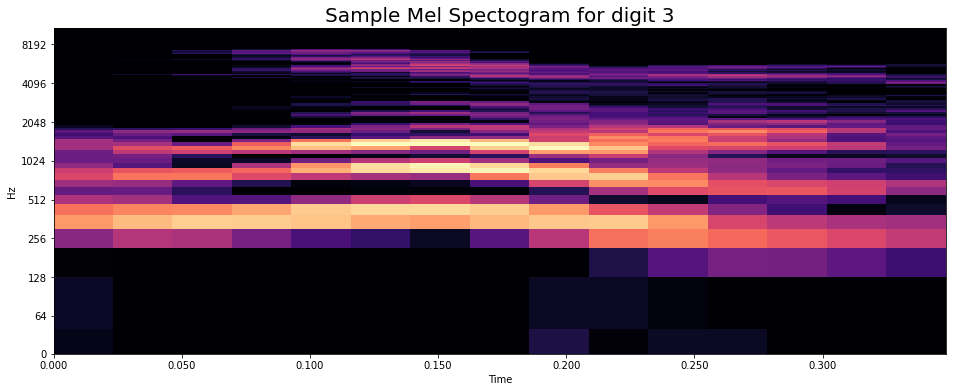

In [ ]:
spec_db, sample_rate = mel_spectrogram_tfm(Path('/content/free-spoken-digit-dataset-master/recordings/0_theo_8.wav'), show=True) 
show_spectrogram('Sample Mel Spectogram for digit 3', spec_db, sample_rate)

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


## Splitting the dataset into training,validation and test sets

In [ ]:
#Converting wav files into png format by making spectrogram for each audio file and saving them into drive 
#Audio files are divided into 10 classes from 0 to 9
import os
import scipy.io.wavfile as wav
import wave
output_dir='gdrive/MyDrive/spectrograms_2'
data_dir='/content/free-spoken-digit-dataset-master/recordings'
for filename in os.listdir(data_dir):
                 if "wav" in filename:
                    file_path = os.path.join(data_dir, filename)
                    target_dir = f'class_{filename[0]}'             
                    dist_dir = os.path.join(output_dir, target_dir)
                    file_dist_path = os.path.join(dist_dir, filename)
                    if not os.path.exists(file_dist_path + '.png'):
                        if not os.path.exists(dist_dir):
                            os.mkdir(dist_dir)                
                        frame_rate, data = wav.read(file_path)
                        signal_wave = wave.open(file_path)
                        sig = np.frombuffer(signal_wave.readframes(frame_rate), dtype=np.int16)
                        fig = plt.figure()
                        plt.specgram(sig, NFFT=1024, Fs=frame_rate, noverlap=900)
                        plt.axis('off')
                        fig.savefig(f'{file_dist_path}.png', dpi=fig.dpi)
                        plt.close()

In [ ]:
BATCH_SIZE = 32
channels = 3
kernel = 4
stride = 1
pool = 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
output_dir="gdrive/MyDrive/spectrograms_2"

In [ ]:
#Make a dataset containing training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.4,
                                             shuffle=True,
                                             color_mode='rgb',
                                             directory=output_dir,
                                             image_size=(432, 288),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.4,
                                             shuffle=True,
                                             directory=output_dir,
                                             color_mode='rgb',
                                             image_size=(432, 288),
                                             subset="validation",
                                             seed=0)

Found 3000 files belonging to 10 classes.
Using 1800 files for training.
Found 3000 files belonging to 10 classes.
Using 1200 files for validation.


In [ ]:
# split valid dataset to test and valid
test_ds = valid_ds.take(8) # get 8 data from valid dataset
valid_ds = valid_ds.skip(8) # skip first 8

In [ ]:
# how many batches are in the training ,test and validation datasets
print("Number of training batches: ", len(train_dataset))
print("Number of validation batches: ", len(valid_dataset))
print("Number of test  batches: ", len(test_ds))

Number of training batches:  57
Number of validation batches:  38
Number of test  batches:  8


In [ ]:
#Checking images and labels shapes (amount of images, height, width, color channels)
for ds in [train_dataset,valid_dataset,test_ds]:
    for image_batch, labels_batch in ds:
      print(f" image shape :{ image_batch.shape}")
      print(f" label shape :{labels_batch.shape}")
      break

 image shape :(32, 432, 288, 3)
 label shape :(32,)
 image shape :(32, 432, 288, 3)
 label shape :(32,)
 image shape :(32, 432, 288, 3)
 label shape :(32,)


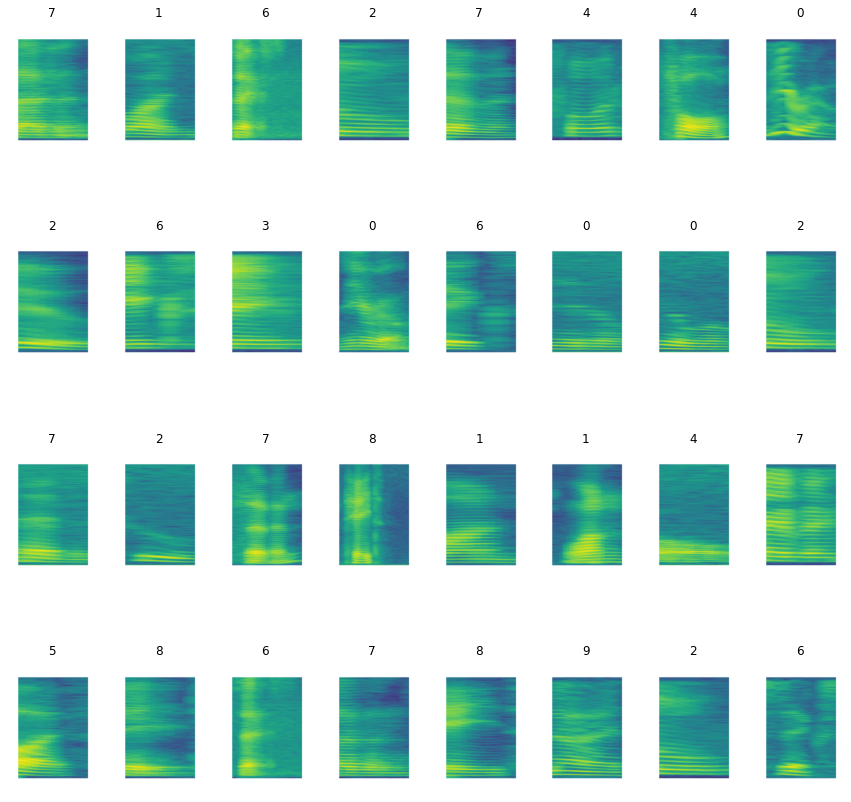

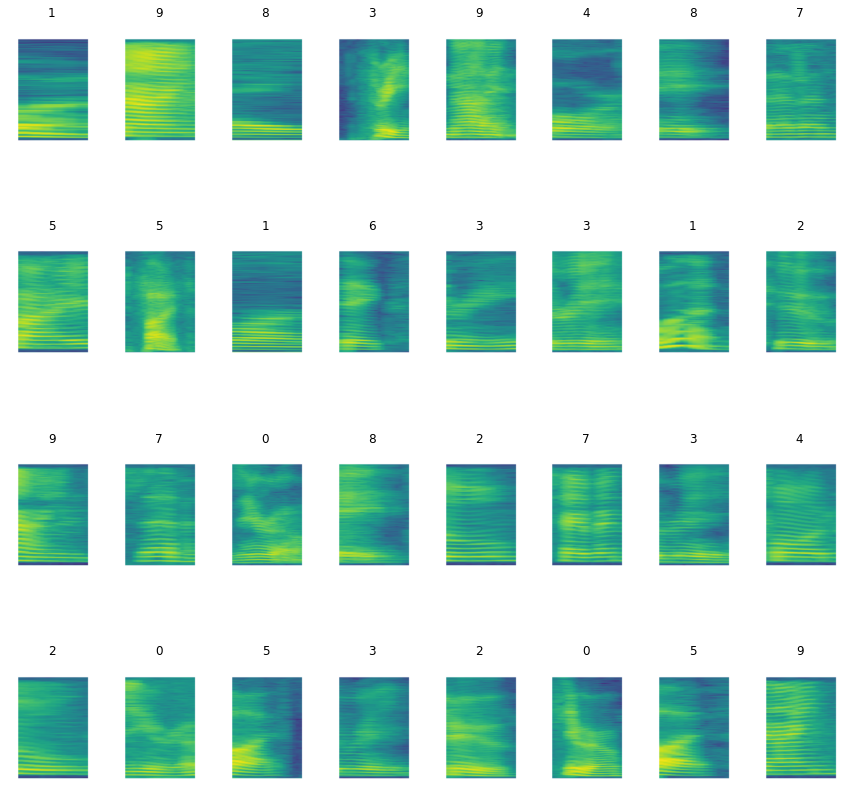

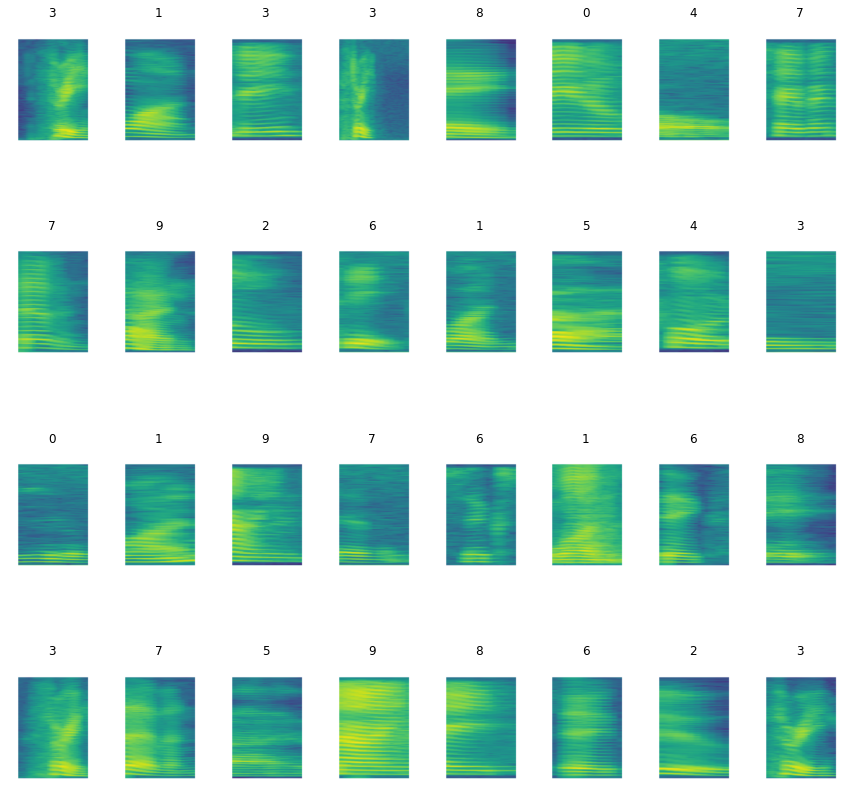

In [ ]:
#Displaying image samples 
for ds in [train_dataset,valid_dataset,test_ds]:
    plt.figure(figsize=(15, 15))
    plt.title("=========================")
    
    for images, labels in train_dataset.take(1):
        for i in range(32):
            ax = plt.subplot(4,8,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")
plt.show()

## Training and Evaluation of Different CNN Models

In [ ]:
#Baseline Model
class_names = train_dataset.class_names
num_classes = 10
train_ds = train_dataset
val_ds = valid_dataset
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
# model from scratch
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(432, 288, channels)),
    layers.Conv2D(16, kernel, stride, activation='relu'),
    layers.Conv2D(32, kernel, stride, activation='relu'),
    layers.MaxPool2D(pool),
    layers.Conv2D(64, kernel, stride, activation='relu'),
    BatchNormalization(),
    layers.MaxPool2D(pool),
    layers.Flatten(),
    layers.Dense(units=64,activation = 'relu'),
    Dropout(0.2, input_shape=(60,)),
    layers.Dense(num_classes,activation='softmax')
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 432, 288, 3)       0         
                                                                 
 conv2d_107 (Conv2D)         (None, 429, 285, 16)      784       
                                                                 
 conv2d_108 (Conv2D)         (None, 426, 282, 32)      8224      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 213, 141, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_109 (Conv2D)         (None, 210, 138, 64)      32832     
                                                                 
 batch_normalization_94 (Bat  (None, 210, 138, 64)     256       
 chNormalization)                                     

In [ ]:
#Compiling the model
model.compile(optimizer='adam', 
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                  metrics=['accuracy'])

In [ ]:
#Training the model
epochs = 10
history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds,
)

Epoch 1/10
57/57 [==============================] - 20s 338ms/step - loss: 0.2814 - accuracy: 0.8894 - val_loss: 0.2888 - val_accuracy: 0.9308
Epoch 2/10
57/57 [==============================] - 20s 339ms/step - loss: 0.2715 - accuracy: 0.8922 - val_loss: 3.2519 - val_accuracy: 0.6000
Epoch 3/10
57/57 [==============================] - 20s 340ms/step - loss: 0.2715 - accuracy: 0.8950 - val_loss: 1.3326 - val_accuracy: 0.7817
Epoch 4/10
57/57 [==============================] - 22s 364ms/step - loss: 0.2869 - accuracy: 0.8933 - val_loss: 0.7378 - val_accuracy: 0.8092
Epoch 5/10
57/57 [==============================] - 20s 339ms/step - loss: 0.2333 - accuracy: 0.9133 - val_loss: 0.7199 - val_accuracy: 0.8425
Epoch 6/10
57/57 [==============================] - 20s 343ms/step - loss: 0.2319 - accuracy: 0.9100 - val_loss: 0.4689 - val_accuracy: 0.8750
Epoch 7/10
57/57 [==============================] - 20s 336ms/step - loss: 0.2214 - accuracy: 0.9183 - val_loss: 0.6106 - val_accuracy: 0.8358

In [ ]:
#To evaluate our CNN, we'll look at the loss and accuracy scores 
#Evaluations are based on both the training and the validation set
final_loss, final_acc = model.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 1.737400, final accuracy: 0.707031


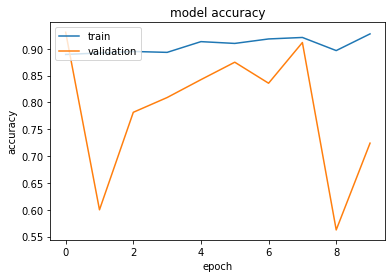

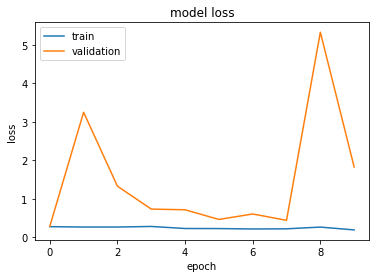

In [ ]:
#Plot between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Plot between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#LeNet-5 Architecture
Model1=tf.keras.Sequential()
Model1.add(tf.keras.Input([432,288,channels]))
Model1.add(tf.keras.layers.Conv2D(6,kernel_size=(5,5),activation="tanh",padding="same"))
Model1.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
Model1.add(tf.keras.layers.Conv2D(16,activation="tanh",kernel_size=(5,5),padding="valid"))
Model1.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding="valid"))
Model1.add(tf.keras.layers.Conv2D(120,kernel_size=(5,5),activation="tanh",padding="valid"))

In [ ]:
Model1.add(tf.keras.layers.Flatten(name="Input_Layer22"))
Model1.add(tf.keras.layers.Dense(84,activation='tanh',name='Hidden_Layer22'))
Model1.add(tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer22'))

In [ ]:
Model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics=["accuracy"])

In [ ]:
History_1=Model1.fit(train_dataset,validation_data=valid_dataset,epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 270s 5s/step - loss: 4.0272 - accuracy: 0.0956 - val_loss: 2.5664 - val_accuracy: 0.1050
Epoch 2/10
57/57 [==============================] - 16s 259ms/step - loss: 2.3572 - accuracy: 0.0978 - val_loss: 2.3090 - val_accuracy: 0.0975
Epoch 3/10
57/57 [==============================] - 16s 257ms/step - loss: 2.3148 - accuracy: 0.0956 - val_loss: 2.3126 - val_accuracy: 0.1017
Epoch 4/10
57/57 [==============================] - 17s 284ms/step - loss: 2.3164 - accuracy: 0.0967 - val_loss: 2.3151 - val_accuracy: 0.1033
Epoch 5/10
57/57 [==============================] - 16s 256ms/step - loss: 2.3217 - accuracy: 0.0872 - val_loss: 2.3123 - val_accuracy: 0.1017
Epoch 6/10
57/57 [==============================] - 16s 259ms/step - loss: 2.3172 - accuracy: 0.1011 - val_loss: 2.3126 - val_accuracy: 0.1017
Epoch 7/10
57/57 [==============================] - 16s 259ms/step - loss: 2.3197 - accuracy: 0.0961 - val_loss: 2.3099 - val_accuracy: 0.1017
Epoch 8/10
5

In [ ]:
final_loss, final_acc = Model1.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 2.306532, final accuracy: 0.117188


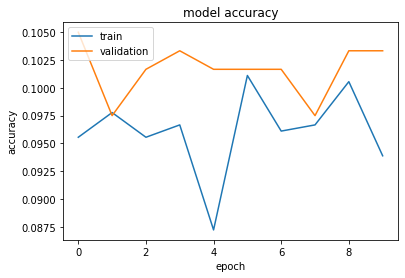

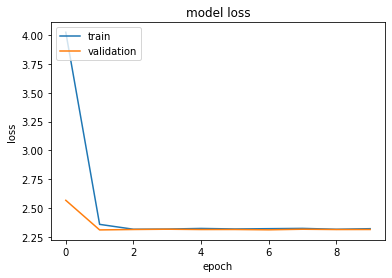

In [ ]:
plt.plot(History_1.history['accuracy'])
plt.plot(History_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_1.history['loss'])
plt.plot(History_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Alexnet Architecture
Model2=tf.keras.Sequential()
Model2.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(432, 288, channels)))
Model2.add(tf.keras.layers.Conv2D(96,kernel_size=(11,11),padding="valid",strides=4,activation="relu"))
Model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
Model2.add(tf.keras.layers.Conv2D(256,kernel_size=(5,5),padding="same",activation="relu"))
Model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
Model2.add(tf.keras.layers.Conv2D(384,kernel_size=(3,3),padding="same",activation="relu"))
Model2.add(tf.keras.layers.Conv2D(384,kernel_size=(3,3),padding="same",activation="relu"))
Model2.add(tf.keras.layers.Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
Model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))

In [ ]:
Model2.add(tf.keras.layers.Flatten(name="Input_Layer"))
Model2.add(tf.keras.layers.Dense(4096,activation='relu',name='Hidden_Layer1'))
Model2.add(tf.keras.layers.Dense(4096,activation='relu',name='Hidden_Layer2'))
Model2.add(tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer'))

In [ ]:
Model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
History_2=Model2.fit(train_dataset, 
      epochs=10,
      validation_data=valid_dataset, 
      verbose=1)

Epoch 1/10
57/57 [==============================] - 19s 281ms/step - loss: 3.5840 - accuracy: 0.1028 - val_loss: 2.3030 - val_accuracy: 0.0975
Epoch 2/10
57/57 [==============================] - 16s 262ms/step - loss: 2.3036 - accuracy: 0.0972 - val_loss: 2.3031 - val_accuracy: 0.0925
Epoch 3/10
57/57 [==============================] - 17s 281ms/step - loss: 2.3032 - accuracy: 0.1000 - val_loss: 2.3036 - val_accuracy: 0.0925
Epoch 4/10
57/57 [==============================] - 16s 267ms/step - loss: 2.3028 - accuracy: 0.1050 - val_loss: 2.3038 - val_accuracy: 0.0925
Epoch 5/10
57/57 [==============================] - 17s 261ms/step - loss: 2.3026 - accuracy: 0.1017 - val_loss: 2.3044 - val_accuracy: 0.0925
Epoch 6/10
57/57 [==============================] - 16s 260ms/step - loss: 2.3026 - accuracy: 0.0961 - val_loss: 2.3041 - val_accuracy: 0.0883
Epoch 7/10
57/57 [==============================] - 16s 262ms/step - loss: 2.3025 - accuracy: 0.0950 - val_loss: 2.3041 - val_accuracy: 0.0925

In [ ]:
final_loss, final_acc = Model2.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 2.303654, final accuracy: 0.085938


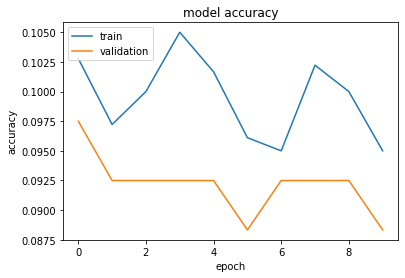

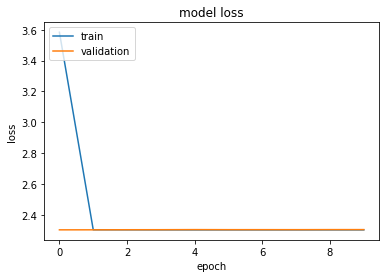

In [ ]:
plt.plot(History_2.history['accuracy'])
plt.plot(History_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_2.history['loss'])
plt.plot(History_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#VGG16 Architecture
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(432, 288, channels), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
Model_3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
Model_3.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
History_3 = Model_3.fit(
train_dataset,
      epochs=10,
      validation_data=valid_dataset,  
      verbose=1)

Epoch 1/10
57/57 [==============================] - 51s 777ms/step - loss: 2.4937 - acc: 0.3478 - val_loss: 1.3862 - val_acc: 0.5533
Epoch 2/10
57/57 [==============================] - 38s 658ms/step - loss: 0.7765 - acc: 0.7361 - val_loss: 0.8910 - val_acc: 0.7125
Epoch 3/10
57/57 [==============================] - 40s 670ms/step - loss: 0.3997 - acc: 0.8783 - val_loss: 0.6267 - val_acc: 0.7958
Epoch 4/10
57/57 [==============================] - 39s 665ms/step - loss: 0.2463 - acc: 0.9361 - val_loss: 0.6086 - val_acc: 0.8008
Epoch 5/10
57/57 [==============================] - 39s 665ms/step - loss: 0.1784 - acc: 0.9611 - val_loss: 0.5139 - val_acc: 0.8342
Epoch 6/10
57/57 [==============================] - 39s 663ms/step - loss: 0.1198 - acc: 0.9817 - val_loss: 0.4533 - val_acc: 0.8542
Epoch 7/10
57/57 [==============================] - 39s 665ms/step - loss: 0.0965 - acc: 0.9894 - val_loss: 0.4314 - val_acc: 0.8558
Epoch 8/10
57/57 [==============================] - 39s 666ms/step - 

In [ ]:
final_loss, final_acc = Model_3.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.448192, final accuracy: 0.851562


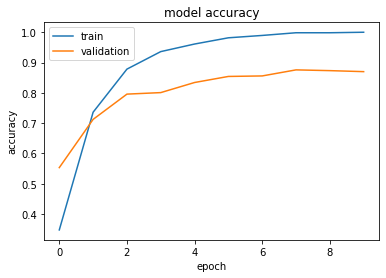

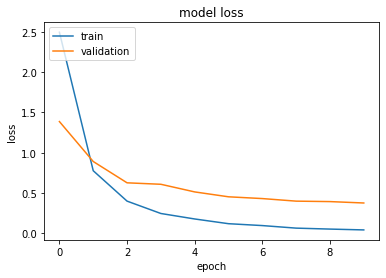

In [ ]:
plt.plot(History_3.history['acc'])
plt.plot(History_3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_3.history['loss'])
plt.plot(History_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#ResNet50 Architecture
from tensorflow.keras.applications.resnet50 import ResNet50
base_model_2 = ResNet50(input_shape=(432,288,channels), weights='imagenet', include_top=False)
base_model_2.trainable = False #freeze the layers

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
Model_4 = tf.keras.Sequential([
    base_model_2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
Model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
History_4 = Model_4.fit(
train_dataset,
      epochs=10,
      validation_data=valid_dataset,  
      verbose=1)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


57/57 [==============================] - 35s 503ms/step - loss: 1.5248 - acc: 0.5733 - val_loss: 0.4597 - val_acc: 0.8517
Epoch 2/10
57/57 [==============================] - 26s 446ms/step - loss: 0.3020 - acc: 0.9133 - val_loss: 0.2905 - val_acc: 0.9167
Epoch 3/10
57/57 [==============================] - 26s 449ms/step - loss: 0.0828 - acc: 0.9856 - val_loss: 0.2991 - val_acc: 0.9125
Epoch 4/10
57/57 [==============================] - 26s 447ms/step - loss: 0.0370 - acc: 0.9978 - val_loss: 0.1966 - val_acc: 0.9442
Epoch 5/10
57/57 [==============================] - 27s 450ms/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.1927 - val_acc: 0.9492
Epoch 6/10
57/57 [==============================] - 26s 447ms/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.1840 - val_acc: 0.9500
Epoch 7/10
57/57 [==============================] - 27s 449ms/step - loss: 0.0114 - acc: 1.0000 - val_loss: 0.1805 - val_acc: 0.9533
Epoch 8/10
57/57 [==============================] - 26s 448ms/step - loss: 0.009

In [ ]:
final_loss, final_acc = Model_4.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.110960, final accuracy: 0.976562


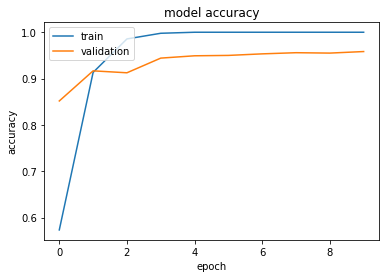

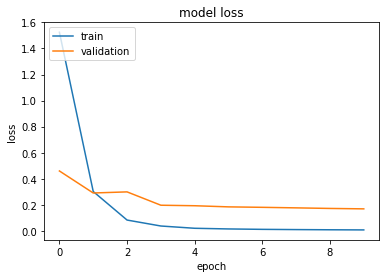

In [ ]:
plt.plot(History_4.history['acc'])
plt.plot(History_4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_4.history['loss'])
plt.plot(History_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#GoogleNet Architecture
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model_3 = InceptionV3(input_shape=(432,288,channels), weights='imagenet', include_top=False)
base_model_3.trainable = False #freeze the layers

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Model_5 = tf.keras.Sequential([
    base_model_3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
Model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
History_5 = Model_5.fit(
train_dataset,
      epochs=10,
      validation_data=valid_dataset, 
      verbose=1)

Epoch 1/10
57/57 [==============================] - 30s 391ms/step - loss: 95.6467 - acc: 0.2872 - val_loss: 13.3631 - val_acc: 0.5692
Epoch 2/10
57/57 [==============================] - 20s 341ms/step - loss: 8.5941 - acc: 0.6367 - val_loss: 6.7494 - val_acc: 0.7125
Epoch 3/10
57/57 [==============================] - 19s 323ms/step - loss: 4.0191 - acc: 0.7494 - val_loss: 4.2555 - val_acc: 0.7575
Epoch 4/10
57/57 [==============================] - 19s 321ms/step - loss: 3.4865 - acc: 0.7794 - val_loss: 8.1058 - val_acc: 0.6592
Epoch 5/10
57/57 [==============================] - 19s 321ms/step - loss: 3.3710 - acc: 0.7956 - val_loss: 9.1307 - val_acc: 0.6808
Epoch 6/10
57/57 [==============================] - 19s 323ms/step - loss: 8.2097 - acc: 0.7056 - val_loss: 13.7394 - val_acc: 0.5942
Epoch 7/10
57/57 [==============================] - 19s 323ms/step - loss: 2.6043 - acc: 0.8561 - val_loss: 5.8983 - val_acc: 0.8033
Epoch 8/10
57/57 [==============================] - 19s 323ms/step

In [ ]:
final_loss, final_acc = Model_5.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 3.791840, final accuracy: 0.854167


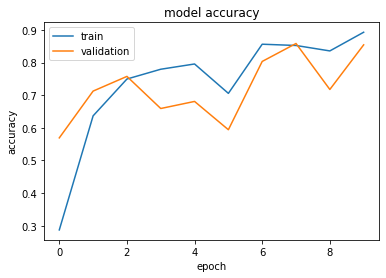

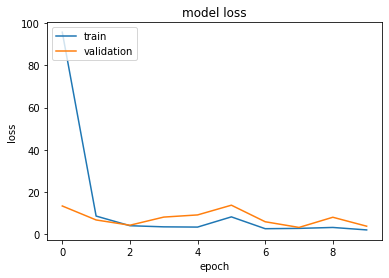

In [ ]:
plt.plot(History_5.history['acc'])
plt.plot(History_5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_5.history['loss'])
plt.plot(History_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#EfficientNetB0 Architecture
from tensorflow.keras.applications.efficientnet import EfficientNetB0
base_model_4 = EfficientNetB0(input_shape=(432,288,channels), weights='imagenet', include_top=False)
base_model_4.trainable = False #freeze the layers

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
Model_6 = tf.keras.Sequential([
    base_model_4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
Model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
History_6 = Model_6.fit(
train_dataset,
      epochs=10,
      validation_data=valid_dataset,  
      verbose=1)

Epoch 1/10
57/57 [==============================] - 27s 347ms/step - loss: 2.0994 - acc: 0.3811 - val_loss: 1.2483 - val_acc: 0.5908
Epoch 2/10
57/57 [==============================] - 19s 301ms/step - loss: 0.8690 - acc: 0.7233 - val_loss: 0.6756 - val_acc: 0.8108
Epoch 3/10
57/57 [==============================] - 18s 301ms/step - loss: 0.5736 - acc: 0.8267 - val_loss: 0.5460 - val_acc: 0.8500
Epoch 4/10
57/57 [==============================] - 18s 299ms/step - loss: 0.4085 - acc: 0.8956 - val_loss: 0.4641 - val_acc: 0.8683
Epoch 5/10
57/57 [==============================] - 18s 303ms/step - loss: 0.3371 - acc: 0.9150 - val_loss: 0.3741 - val_acc: 0.9033
Epoch 6/10
57/57 [==============================] - 18s 303ms/step - loss: 0.3051 - acc: 0.9189 - val_loss: 0.5345 - val_acc: 0.8258
Epoch 7/10
57/57 [==============================] - 18s 303ms/step - loss: 0.2645 - acc: 0.9267 - val_loss: 0.3211 - val_acc: 0.9083
Epoch 8/10
57/57 [==============================] - 18s 300ms/step - 

In [ ]:
final_loss, final_acc = Model_6.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.263998, final accuracy: 0.917969


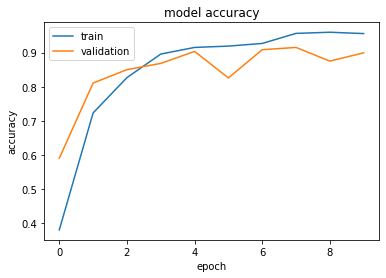

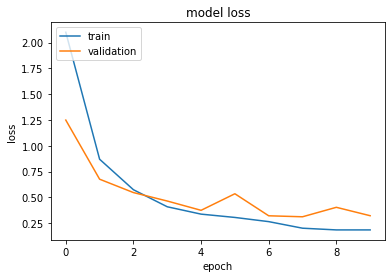

In [ ]:
plt.plot(History_6.history['acc'])
plt.plot(History_6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_6.history['loss'])
plt.plot(History_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#MobileNetV2 Architecture
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base_model_5 = MobileNetV2(input_shape=(432,288,channels), weights='imagenet', include_top=False)
base_model_5.trainable = False #freeze the layers

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
Model_7 = tf.keras.Sequential([
    base_model_5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
Model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

In [ ]:
History_7 = Model_7.fit(
train_dataset,
      epochs=10,
      validation_data=valid_dataset, 
      verbose=1)

Epoch 1/10
57/57 [==============================] - 20s 287ms/step - loss: 1.9810 - acc: 0.4544 - val_loss: 0.9388 - val_acc: 0.7042
Epoch 2/10
57/57 [==============================] - 16s 266ms/step - loss: 0.6183 - acc: 0.7961 - val_loss: 0.5783 - val_acc: 0.8183
Epoch 3/10
57/57 [==============================] - 16s 266ms/step - loss: 0.3192 - acc: 0.9289 - val_loss: 0.5342 - val_acc: 0.8208
Epoch 4/10
57/57 [==============================] - 16s 268ms/step - loss: 0.2163 - acc: 0.9578 - val_loss: 0.4367 - val_acc: 0.8658
Epoch 5/10
57/57 [==============================] - 16s 273ms/step - loss: 0.1580 - acc: 0.9733 - val_loss: 0.4037 - val_acc: 0.8758
Epoch 6/10
57/57 [==============================] - 18s 297ms/step - loss: 0.1479 - acc: 0.9717 - val_loss: 0.4209 - val_acc: 0.8658
Epoch 7/10
57/57 [==============================] - 16s 262ms/step - loss: 0.0725 - acc: 0.9961 - val_loss: 0.3376 - val_acc: 0.8950
Epoch 8/10
57/57 [==============================] - 17s 275ms/step - 

In [ ]:
final_loss, final_acc = Model_7.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.266781, final accuracy: 0.898438


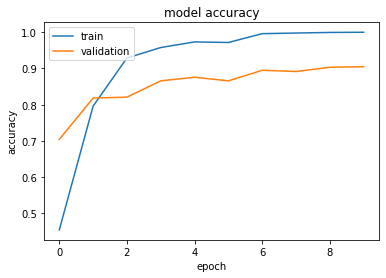

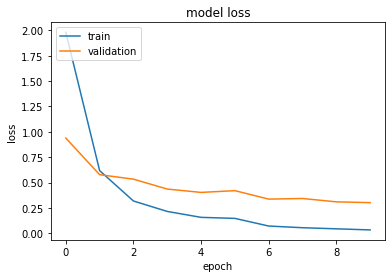

In [ ]:
plt.plot(History_7.history['acc'])
plt.plot(History_7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_7.history['loss'])
plt.plot(History_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#ZFNet Architecture
Model8 = tf.keras.models.Sequential([
                                    
		tf.keras.layers.Conv2D(96, (7, 7), strides=(2, 2), activation='relu',
			input_shape=(432, 288, 3)),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(256, (5, 5), strides=(2, 2), activation='relu'),
		tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Lambda(lambda x: tf.image.per_image_standardization(x)),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(384, (3, 3), activation='relu'),

		tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),

		tf.keras.layers.MaxPooling2D(3, strides=2),

    tf.keras.layers.Flatten(),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(4096),

		tf.keras.layers.Dense(10, activation='softmax')
	])


In [ ]:
Model8.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
History_8=Model8.fit(train_dataset,
          validation_data=valid_dataset,
					epochs=10)

Epoch 1/10
57/57 [==============================] - 21s 313ms/step - loss: 2.3972 - accuracy: 0.0956 - val_loss: 2.3082 - val_accuracy: 0.1017
Epoch 2/10
57/57 [==============================] - 18s 291ms/step - loss: 2.3098 - accuracy: 0.0883 - val_loss: 2.3056 - val_accuracy: 0.1017
Epoch 3/10
57/57 [==============================] - 19s 320ms/step - loss: 2.3115 - accuracy: 0.0950 - val_loss: 2.3083 - val_accuracy: 0.1017
Epoch 4/10
57/57 [==============================] - 17s 290ms/step - loss: 2.3100 - accuracy: 0.0978 - val_loss: 2.3069 - val_accuracy: 0.1017
Epoch 5/10
57/57 [==============================] - 18s 293ms/step - loss: 2.3097 - accuracy: 0.0922 - val_loss: 2.3056 - val_accuracy: 0.1017
Epoch 6/10
57/57 [==============================] - 17s 289ms/step - loss: 2.3090 - accuracy: 0.0956 - val_loss: 2.3058 - val_accuracy: 0.0975
Epoch 7/10
57/57 [==============================] - 18s 294ms/step - loss: 2.3107 - accuracy: 0.0967 - val_loss: 2.3078 - val_accuracy: 0.1017

In [ ]:
final_loss, final_acc = Model8.evaluate(test_ds, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 2.303441, final accuracy: 0.109375


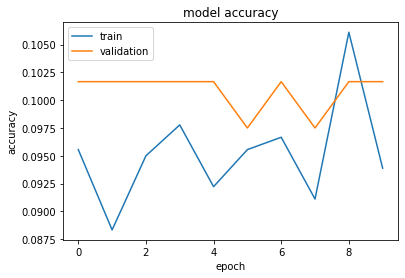

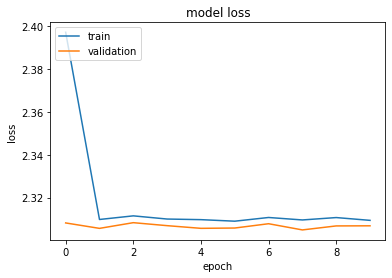

In [ ]:
plt.plot(History_8.history['accuracy'])
plt.plot(History_8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(History_8.history['loss'])
plt.plot(History_8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Performance Analysis in terms of error metrics used and optimization performed

In all the 8 CNN models and base model we are using **accuracy** as the error metrics

Accuracy->Number of misclassifications of the digits are calculated during performance measure.

->We train the model by splitting dataset into training and validation
sets then evaluate the model's final **accuracy** and final **loss** using the test set labels

In all the CNN models except for ZFNet we are using **Adam** optimizer 
In ZFNet we use **SGD** as optimizer

->We observed that transfer learning models perform better in terms of accuracy and loss when compared to other models like AlexNet or LeNet-5.

->The **lowest** accuracy is of **AlexNet** architecture which is **8.59**% with a loss of 2.30 while the **highest** accuracy is of **ResNet50** architecture that is **97.65**% with a loss of 0.11


 




##Conclusion
**Best** **Model**->Therefore we can say that the best model is **ResNet5** with **97.65**% accuracy and **0.11** loss.